In [1]:
# VADER: https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-rule-based-vader-and-nltk-72067970fb71

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy

In [16]:
data = pd.read_pickle("./data/cleaned_submissions.pkl")
data = data.loc[data["sentiment"] != "", ["text", "sentiment"]] # Only get labeled instances

In [17]:
# Encode labels
lenc = LabelEncoder()
y = lenc.fit_transform(data["sentiment"])

# Vectorize text using tfidf
tfidf = TfidfVectorizer(preprocessor=' '.join, lowercase=False, min_df=5) # min_df = Minimum occurance of words
X = tfidf.fit_transform(data["text"])

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# SVM

In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline([
        ("svc", SVC())
    ])

param_grid = {"svc__kernel": ["poly"], "svc__C": [3]} #["poly", "rbf", "sigmoid", "linear"], [3, 4, 5, 6, 7]
CV = GridSearchCV(pipeline, param_grid, cv = 5)
# pipeline.get_params().keys() See all available parameters
CV.fit(X_train, y_train)

In [30]:
print("Accuracy of {} can be achieved with the following parameters: {}".format(CV.score(X_test, y_test), CV.best_params_))

Accuracy of 0.6056808688387636 can be achieved with the following parameters: {'svc__C': 3, 'svc__kernel': 'poly'}


# Naive Bayes

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline([
        ("mnb", MultinomialNB())
    ])

param_grid = {"mnb__alpha": [1]}
CV = GridSearchCV(pipeline, param_grid, cv = 5)
# pipeline.get_params().keys() See all available parameters
CV.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [32]:
print("Accuracy of {} can be achieved with the following parameters: {}".format(CV.score(X_test, y_test), CV.best_params_))

Accuracy of 0.5970481759955444 can be achieved with the following parameters: {'mnb__alpha': 1}


# LSTM

In [12]:
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [83]:
# DEV!!!
# Less data, so I can check if the model works
X_train_lstm = X_train_lstm[:50, :, :]
y_train = y_train[:50]

In [93]:
from keras.models import Sequential
from keras.layers import Embedding, Dense

def build_model(dims, hidden_states, opt):
    model = Sequential()
    model.add(Embedding(4936, dim))
    model.add(LSTM(hidden_states))
    model.add(Dense(1, activation = "softmax"))
    model.compile(opt, "cateogrical_crossentropy", metrics = ["acc"])

In [113]:
dim = [256, 512, 1024]
hidden_states = [16, 32, 64]
optimi = ["rmsprop", "SGD", "Adam"]

acc = []
val_acc = []
loss = []
val_loss = []

param_list = []

for d in dim:
    for state in hidden_states:
        for opt in optimi:
            history = model.fit(X_train_lstm, y_train,
                        epochs=2,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=0)
            acc.append(history.history['acc'])
            val_acc.append(history.history['val_acc'])
            loss.append(history.history['loss'])
            val_loss.append(history.history['val_loss'])
            param_list.append("Optimizer: " + opt + " - States: " + str(state) + " - Dimensions:" + str(d))


In [114]:
import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, xlabel='Epochs', ylabel=None):
    ''' Plots a list of vectors.

    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)

    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    plt.show()


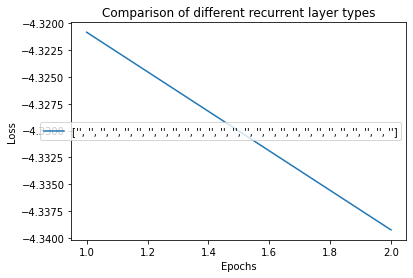

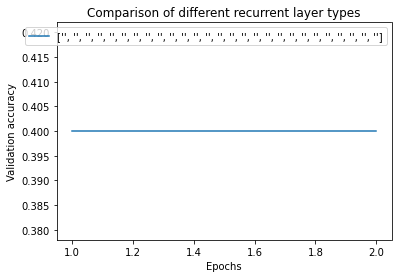

In [115]:
plot_history(data_list=val_loss,
             label_list=[[""]*len(param_list)], #param_list,
             title='Comparison of different recurrent layer types',
             ylabel='Loss')
plot_history(data_list=val_acc,
             label_list=[[""]*len(param_list)], #param_list,
             title='Comparison of different recurrent layer types',
             ylabel='Validation accuracy')